In [17]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
data = scipy.io.loadmat('case1_1.mat')
for i in data:
    if'__' not in i and 'readme' not in i :
        np.savetxt(("case1_1"+i+".csv"),data[i],delimiter=',')
print (data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI, Created on: Fri Feb 28 15:18:51 2014', '__version__': '1.0', '__globals__': [], 'teeth': array([[32]], dtype=uint8), 'ppr': array([[8]], dtype=uint8), 'gs': array([[0.76869321],
       [0.74118978],
       [1.36261964],
       ...,
       [0.24465132],
       [1.45718968],
       [0.55262822]]), 'sr': array([[97656]]), 'tach': array([[6.20800000e-04],
       [5.05568000e-03],
       [9.43968000e-03],
       ...,
       [4.07955284e+01],
       [4.07996445e+01],
       [4.08037911e+01]])}


## Extracted data from case1_1
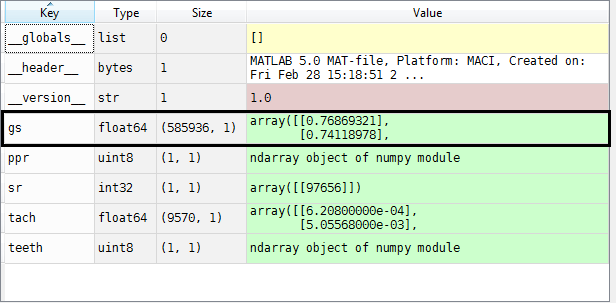


In [24]:
gs = pd.read_csv ("case1_1gs.csv")
gs.head()

,7.686932100000000156e-01
0,0.741190
1,1.362620
2,0.778255
3,2.375829
4,1.213154


In [6]:
type(gs)

pandas.core.frame.DataFrame

In [82]:
len(gs)

585936

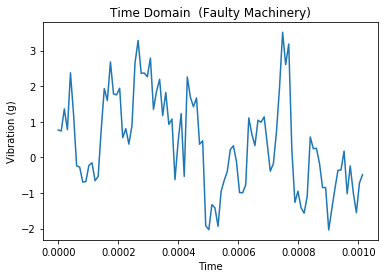

In [85]:
# Data plotting
plt.plot(time[0:100], gs[0:100])
plt.xlabel('Time')
plt.ylabel('Vibration (g)')
plt.title('Time Domain  (Faulty Machinery)');

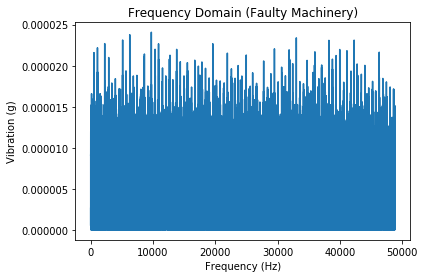

In [87]:
from scipy.fftpack import fft

# Nyquist Sampling Criteria
T = 1/sampling_rate # inverse of the sampling rate
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

# FFT algorithm
yr = fft(gs) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only

# Plotting the results
plt.plot(x, y)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Faulty Machinery)');

In [103]:
import scipy.io
data1 = scipy.io.loadmat('case3_4.mat')
for i in data:
    if'__' not in i and 'readme' not in i :
        np.savetxt(("case3_4"+i+".csv"),data[i],delimiter=',')
print (data1)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI, Created on: Fri Feb 28 15:22:01 2014', '__version__': '1.0', '__globals__': [], 'teeth': array([[32]], dtype=uint8), 'ppr': array([[8]], dtype=uint8), 'gs': array([[-1.19611001],
       [ 0.79196346],
       [ 0.34730619],
       ...,
       [ 1.1481421 ],
       [ 0.17330238],
       [-0.27742162]]), 'sr': array([[97656]]), 'tach': array([[6.52800000e-05],
       [4.36512000e-03],
       [8.65408000e-03],
       ...,
       [4.02407799e+01],
       [4.02453651e+01],
       [4.02499390e+01]])}


In [104]:
gs1 = pd.read_csv ("case3_4gs.csv")
gs1.head()

,7.686932100000000156e-01
0,0.741190
1,1.362620
2,0.778255
3,2.375829
4,1.213154


In [105]:
len(gs1)

585935

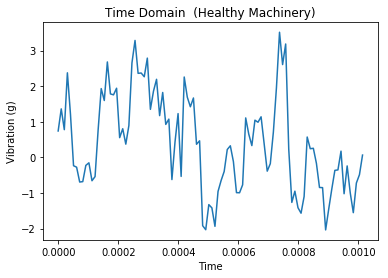

In [106]:
# Data plotting
plt.plot(time[0:100], gs1[0:100])
plt.xlabel('Time')
plt.ylabel('Vibration (g)')
plt.title('Time Domain  (Healthy Machinery)');

In [ ]:
from scipy.fftpack import fft

# Nyquist Sampling Criteria
T1 = 1/sampling_rate # inverse of the sampling rate
x1 = np.linspace(0.0, 1.0/(2.0*T1), int(N/2))

# FFT algorithm
yr1 = fft(gs1) # "raw" FFT with both + and - frequencies
y1 = 2/N * np.abs(yr1[0:np.int(N/2)]) # positive freqs only

# Plotting the results
plt.plot(x1, y1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Faulty Machinery)');

In [2]:
turbinedata = pd.read_csv("dataset.csv")

In [3]:
turbinedata.shape

(144, 6)

In [4]:
turbinedata.head()

,RMS,MEAN,STDev,VARIANCE,KURTOSIS,CLASS
0,1.6918,0.71827,1.5318,2.3464,-43.9466,0
1,1.3942,0.76061,1.1684,1.3652,-42.9466,0
2,1.3937,0.76297,1.1663,1.3603,-41.9466,0
3,1.3934,0.76021,1.1677,1.3636,-40.9466,0
4,1.3943,0.76021,1.1688,1.3662,-39.9466,0


In [5]:
X = turbinedata.drop('CLASS', axis=1)  
y = turbinedata['CLASS'] 

In [6]:
X.head()

,RMS,MEAN,STDev,VARIANCE,KURTOSIS
0,1.6918,0.71827,1.5318,2.3464,-43.9466
1,1.3942,0.76061,1.1684,1.3652,-42.9466
2,1.3937,0.76297,1.1663,1.3603,-41.9466
3,1.3934,0.76021,1.1677,1.3636,-40.9466
4,1.3943,0.76021,1.1688,1.3662,-39.9466


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40) 

In [39]:
X_train.shape, y_train.shape

((115, 5), (115,))

In [40]:
X_test.shape, y_test.shape

((29, 5), (29,))

In [59]:
from sklearn import svm
from sklearn.preprocessing import scale
svclassifier = svm.NuSVC()
svclassifier.fit(X_train, y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [60]:
svclassifier.score(X_test, y_test)  #accuracy

0.9482758620689655